## Variable selection 3: Exhaustive Feature Selector

This notebook goes with the blog post: [Variable selection in Python, part I](https://mycarta.wordpress.com/2019/04/30/variable-selection-in-python-part-i/).

### Preliminaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import  LinearRegression
from sklearn.pipeline import Pipeline

### Data loading, dropping production

In [2]:
data = pd.read_csv('../data/Table2_Hunt_2013_edit.csv').astype('float64')

### Scaling features

In [3]:
y =  data.Production
X = data.drop('Production',axis=1)

### Exhaustive Feature Selection with linear regressor

In [4]:
loo = LeaveOneOut()

In [5]:
LR = LinearRegression()

efs = EFS(estimator=LR, 
          min_features=1,
          max_features=7, 
          print_progress=False,
          clone_estimator=False, 
          scoring='neg_mean_squared_error',
          cv = loo,
          n_jobs = 1)

feature_names = list(X)
efs = efs.fit(X, y, custom_feature_names=feature_names)

df = pd.DataFrame.from_dict(efs.get_metric_dict()).T
df=df.sort_values('avg_score', inplace=False, ascending=False)
df.head(10)

,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err
63,-7.21576,4.22087,"[-16.299493428919465, -0.27293368410213975, -5...","(0, 1, 2, 3)","(Gross pay, Phi-h, Position, Pressure)",9.07683,2.02964
98,-7.68695,4.32124,"[-17.240275443538458, -0.9148294028144249, -7....","(0, 1, 2, 3, 4)","(Gross pay, Phi-h, Position, Pressure, Random 1)",9.29267,2.0779
100,-8.55234,4.89862,"[-30.9842015886456, -0.05176004120042699, -7.2...","(0, 1, 2, 3, 6)","(Gross pay, Phi-h, Position, Pressure, Gross p...",10.5343,2.35554
99,-8.92579,5.28526,"[-23.869362163109628, -0.05168559445178693, -4...","(0, 1, 2, 3, 5)","(Gross pay, Phi-h, Position, Pressure, Random 2)",11.3658,2.54146
120,-9.27588,5.23563,"[-30.687345595779497, -0.3825763097298654, -8....","(0, 1, 2, 3, 4, 6)","(Gross pay, Phi-h, Position, Pressure, Random ...",11.259,2.5176
119,-9.49948,5.4662,"[-23.61589761681719, -0.44842229598679156, -5....","(0, 1, 2, 3, 4, 5)","(Gross pay, Phi-h, Position, Pressure, Random ...",11.7549,2.62847
121,-11.0006,6.50243,"[-42.98345893466871, -0.06779952813638472, -4....","(0, 1, 2, 3, 5, 6)","(Gross pay, Phi-h, Position, Pressure, Random ...",13.9832,3.12675
126,-12.1561,6.90979,"[-41.54727896993089, -0.017650149676850458, -5...","(0, 1, 2, 3, 4, 5, 6)","(Gross pay, Phi-h, Position, Pressure, Random ...",14.8593,3.32263
85,-12.7135,9.0364,"[-5.759491936873215, -2.3597172130200863, -1.8...","(1, 2, 3, 6)","(Phi-h, Position, Pressure, Gross pay transform)",19.4325,4.34523
114,-12.8217,9.22475,"[-6.269788890694149, -6.072355473750046, -3.40...","(1, 2, 3, 4, 6)","(Phi-h, Position, Pressure, Random 1, Gross pa...",19.8375,4.4358


In [6]:
mark = int(df.head(1).index.values)
print(mark)

63


### Plotting results

Plot function modified from:  http://rasbt.github.io/mlxtend/user_guide/feature_selection/ExhaustiveFeatureSelector/#example-2-visualizing-the-feature-selection-results

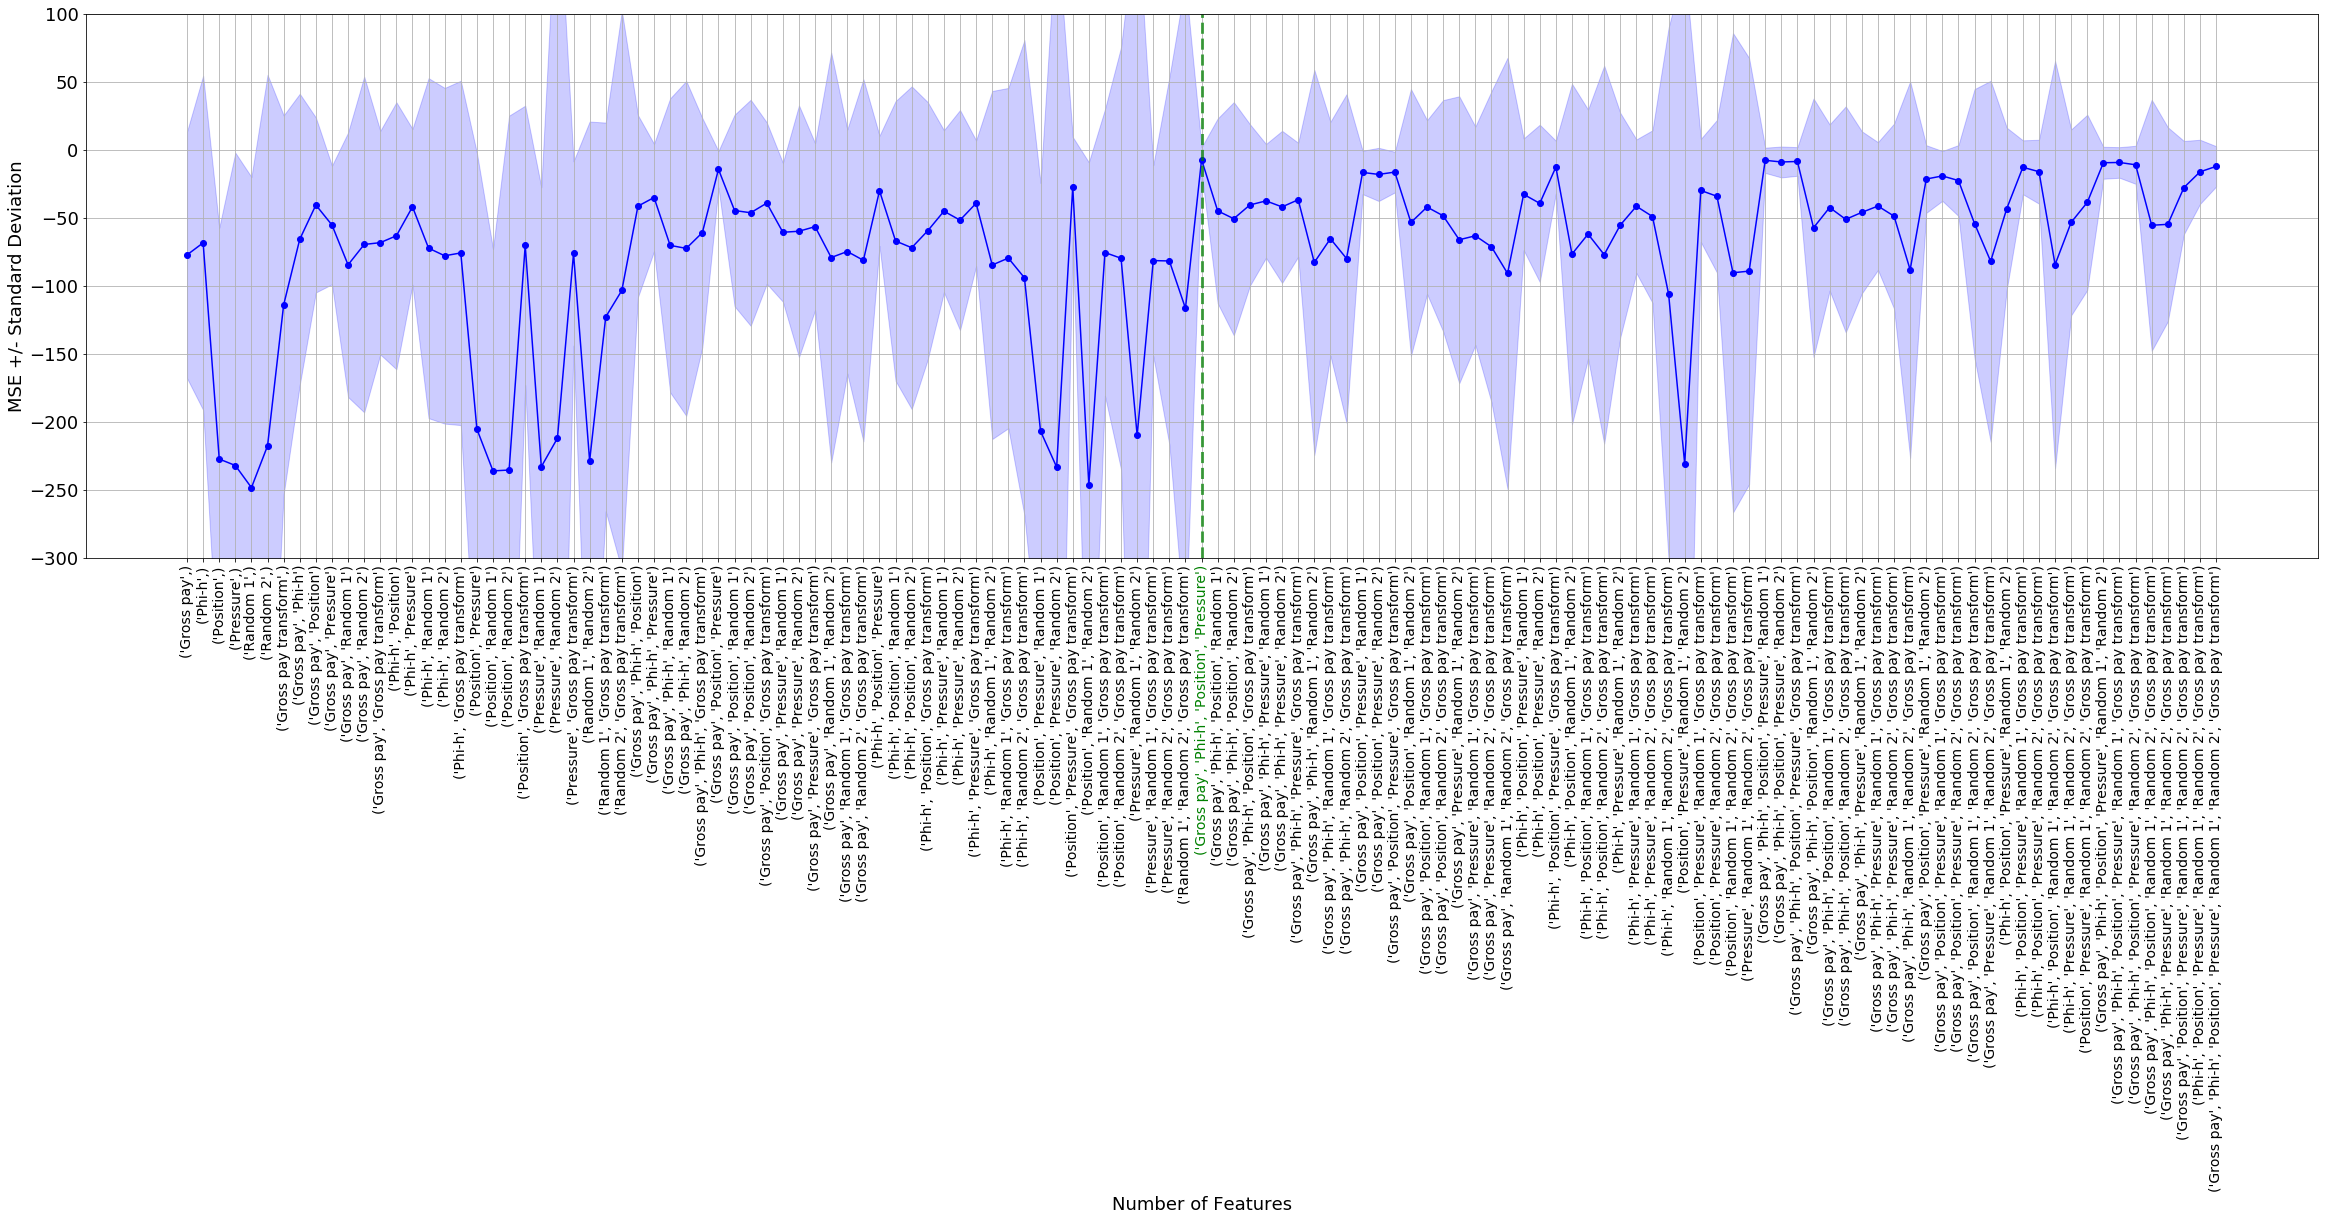

In [7]:
##### Added by Matteo ######
font = {'size'   : 14}
plt.rc('font', **font) 
plt.rc('ytick',labelsize=18)
############################

metric_dict = efs.get_metric_dict()

fig = plt.figure(figsize = (40, 10))
k_feat = sorted(metric_dict.keys())
avg = [metric_dict[k]['avg_score'] for k in k_feat]

upper, lower = [], []
for k in k_feat:
    upper.append(metric_dict[k]['avg_score'] +
                 metric_dict[k]['std_dev'])
    lower.append(metric_dict[k]['avg_score'] -
                 metric_dict[k]['std_dev'])

plt.fill_between(k_feat,
                 upper,
                 lower,
                 alpha=0.2,
                 color='blue',
                 lw=1)

plt.plot(k_feat, avg, color='blue', marker='o')
plt.plot([mark, mark], [-300, 100], '--g', linewidth=3, alpha=0.7)
plt.ylabel('MSE +/- Standard Deviation', fontsize=18)
plt.xlabel('Number of Features',  fontsize=18)
feature_min = len(metric_dict[k_feat[0]]['feature_idx'])
feature_max = len(metric_dict[k_feat[-1]]['feature_idx'])
plt.xticks(k_feat, 
           [str(metric_dict[k]['feature_names']) for k in k_feat], 
           rotation=90)
plt.ylim(-300, 100)
plt.gca().get_xticklabels()[mark].set_color("g")
plt.grid()
plt.show()
